In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
# Generate some example data
x_train = np.random.randn(100, 2)
y_train = np.random.randint(0, 2, (100, 1)) 

In [ ]:
# slove error : InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul]
x_train = x_train.astype('float32')
y_train = y_train.astype('float32')

In [ ]:
# Define the model parameters
input_dim = x_train.shape[1]
output_dim = y_train.shape[1]
learning_rate = 0.01

In [ ]:
# Initialize the model parameters
w = tf.Variable(tf.random.normal(shape=(input_dim, output_dim), mean=0.0, stddev=1.0))
b = tf.Variable(tf.zeros(shape=(output_dim,)))

In [ ]:
# define the prediction functions
def compute_predictions(x):
  return tf.matmul(x, w) + b

In [ ]:
# Define the sigmoid activation function
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))


In [ ]:
# Define the loss function
def cross_entropy_loss(y_true, y_pred):
    #return -1/len(X) * tf.reduce_sum(y_true * tf.math.log(sigmoid(X @ w + b)) + (1-y_true) * tf.math.log(1 - sigmoid(X @ w + b)))
    return -tf.reduce_mean(y_true * tf.math.log(y_pred) + (1 - y_true) * tf.math.log(1 - y_pred))

In [ ]:
# Train the model
def train_model(x,y):
  
    with tf.GradientTape() as tape:
        # Compute the logits and probabilities
        logits = compute_predictions(x)
        probs = sigmoid(logits)

        # Compute the loss
        #loss = cross_entropy_loss(y, probs)
        loss = cross_entropy_loss(y, probs)

        # Compute the gradients
        grads = tape.gradient(loss, [w, b])

    # Update the parameters
    w.assign_sub(learning_rate * grads[0])
    b.assign_sub(learning_rate * grads[1])
    
    return loss

In [ ]:
'''
# Create a tf.data.Dataset object for easy batched iteration
ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds = ds.shuffle(buffer_size=1024).batch(256)
'''

'\n# Create a tf.data.Dataset object for easy batched iteration\nds = tf.data.Dataset.from_tensor_slices((x_train, y_train))\nds = ds.shuffle(buffer_size=1024).batch(256)\n'

In [ ]:
# model train
loss_list=[]
for epoch in range(3000):
    # Save the loss for each epoch
    loss = train_model(x_train,y_train)
    loss_list.append(loss.numpy())
    # Print the loss every 10 epochs
    if epoch % 1000 == 0:
        print("Epoch %d: Loss %f" % (epoch, loss))



Epoch 0: Loss 0.756109
Epoch 1000: Loss 0.688541
Epoch 2000: Loss 0.687945


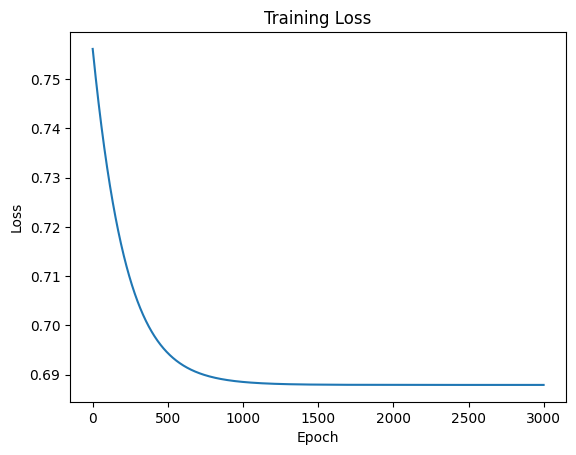

In [ ]:
# Plot the loss over time
plt.plot(loss_list)
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show();

In [ ]:
# Evaluate the model
x_test = np.random.randn(10, 2)
y_test = np.random.randint(0, 2, (10, 1))

# slove error : InvalidArgumentError: cannot compute MatMul as input #1(zero-based) was expected to be a double tensor but is a float tensor [Op:MatMul]

x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

In [ ]:
# ##### test the model on test data #######
#cupute y_test_pred
logits = compute_predictions(x_test)
# calc its probability
probs = sigmoid(logits)
#perform threshold = 0.5 
predictions = tf.cast(probs > 0.5, tf.int32)

In [ ]:
# compare true values with prediction
np.hstack((y_test,predictions))

array([[0., 0.],
       [1., 1.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 1.]])

In [ ]:
# calc the accuracy
accuracy = tf.reduce_mean(tf.cast(tf.equal(predictions, y_test), tf.float32))
print("Test Accuracy:", accuracy.numpy())


Test Accuracy: 0.7
